# Import & Clean Dataset


In [ ]:
import pandas as pd
dataset = pd.read_csv('Amazon.csv')
dataset.head()

In [ ]:
# check for null values
dataset.isnull().sum()

In [ ]:
# check for duplicate values
dataset.duplicated().sum()

In [ ]:
# convert the rating_count from string to float
dataset['rating_count'] = dataset['rating_count'].str.replace(',', '')
dataset['rating_count'] = dataset['rating_count'].astype(float)
# Filling in missing data for rating_count
dataset['rating_count'].fillna(dataset['rating_count'].median(), inplace=True)
dataset['rating_count'].isnull().sum()

In [ ]:
#Changing the data type of discounted price and actual price

dataset['discounted_price'] = dataset['discounted_price'].str.replace("₹",'')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(",",'')
dataset['discounted_price'] = dataset['discounted_price'].astype('float64')

dataset['actual_price'] = dataset['actual_price'].str.replace("₹",'')
dataset['actual_price'] = dataset['actual_price'].str.replace(",",'')
dataset['actual_price'] = dataset['actual_price'].astype('float64')

In [ ]:
#Changing Datatype and values in Discount Percentage

dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%','').astype('float64')

dataset['discount_percentage'] = dataset['discount_percentage'] / 100

dataset['discount_percentage']

In [ ]:
#Finding unusual string in the rating column

dataset['rating'].value_counts()
dataset.query('rating == "|"')

In [ ]:
#Removing the unusual string in the rating column
dataset['rating'] = dataset['rating'].str.replace('|', '4.0').astype('float64')

In [ ]:
category_split = dataset['category'].str.split('|', expand=True)
category_split
category_split = category_split.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [ ]:
# add the 3 new columns to the dataset
dataset['category_1'] = category_split['category_1']
dataset['category_2'] = category_split['category_2']
# drop the original category column
dataset.drop('category', axis=1, inplace=True)

dataset.head()

In [ ]:
#Fixing Strings in the Category_1 Column

dataset['category_1'] = dataset['category_1'].str.replace('&', ' & ')
dataset['category_1'] = dataset['category_1'].str.replace('OfficeProducts', 'Office Products')
dataset['category_1'] = dataset['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
dataset['category_1'] = dataset['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [ ]:
#Checking category_2 unique values

dataset['category_2'].value_counts()

In [ ]:
#Fixing Strings in Category_2 column

dataset['category_2'] = dataset['category_2'].str.replace('&', ' & ')
dataset['category_2'] = dataset['category_2'].str.replace(',', ', ')
dataset['category_2'] = dataset['category_2'].str.replace('HomeAppliances', 'Home Appliances')
dataset['category_2'] = dataset['category_2'].str.replace('AirQuality', 'Air Quality')
dataset['category_2'] = dataset['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
dataset['category_2'] = dataset['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
dataset['category_2'] = dataset['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
dataset['category_2'] = dataset['category_2'].str.replace('ExternalDevices', 'External Devices')
dataset['category_2'] = dataset['category_2'].str.replace('DataStorage', 'Data Storage')
dataset['category_2'] = dataset['category_2'].str.replace('HomeStorage', 'Home Storage')
dataset['category_2'] = dataset['category_2'].str.replace('HomeAudio', 'Home Audio')
dataset['category_2'] = dataset['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
dataset['category_2'] = dataset['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
dataset['category_2'] = dataset['category_2'].str.replace('CraftMaterials', 'Craft Materials')
dataset['category_2'] = dataset['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
dataset['category_2'] = dataset['category_2'].str.replace('PowerAccessories', 'Power Accessories')
dataset['category_2'] = dataset['category_2'].str.replace('CarAccessories', 'Car Accessories')
dataset['category_2'] = dataset['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
dataset['category_2'] = dataset['category_2'].str.replace('HomeTheater', 'Home Theater')

In [ ]:
# Removing Whitespace from product_id
dataset['product_id'].str.strip()

In [ ]:
#Creating Categories for Rankings

rating_score = []

for score in dataset['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [ ]:
#Creating A new Column and Changing the Data Type

dataset['rating_score'] = rating_score

dataset['rating_score'] = dataset['rating_score'].astype('category')

In [ ]:
#Reordered Categories

dataset['rating_score'] = dataset['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [ ]:
#Creating Difference of Price Column between Actual Price and Discounted Price
dataset['difference_price'] = dataset['actual_price'] - dataset['discounted_price']

In [ ]:
#Result After Cleaning and Preperation after first cleaned dataframe
dataset.head()

In [ ]:
#Subsetting Reviewers Identifications

reviewers = dataset[['user_id','user_name']]
reviewers

In [ ]:
#Splitting the strings in user_id column

reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

In [ ]:
#Making user id display 1 id per row

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

In [ ]:
#Splitting the strings in user_name column

reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

In [ ]:
#Making user name display 1 id per row

review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

In [ ]:
#Creating 2 Data Frames to be merged

dataframe_review_id = pd.DataFrame(data=reviewer_id_clean)
dataframe_review_name = pd.DataFrame(data=reviewer_name_clean)

In [ ]:
#Merging the 2 dataframe containing user_id and user_name

reviewer_id_name = pd.concat([dataframe_review_id, dataframe_review_name], axis=1)

In [ ]:
# store the new dataframe to a new csv file with the first row as header
reviewer_id_name.to_csv('reviewer_id_name.csv', index=False, header=True)

In [ ]:
#Final Check for the new dataframe

reviewer_id_name.head()

### New csv file with cleaned data


In [ ]:
# export the cleaned dataset to a new csv file with the first row as header
dataset.to_csv('Amazon_cleaned.csv', index=False, header=True)

# Part 4 - Exploration and Preparation:

## 1. Investigate the structure and shape of your dataset.


*Structure of Dataset*


In [ ]:
info = dataset.info()
print(info)

*Data Shape (Rows & Columns)*

In [ ]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

## 2. Explore the variables that the dataset has. How are they distributed?


*Data Types*

In [ ]:
types = dataset.dtypes
print(types)

**Using describe() function to print the summary statistics to check data distribution**


In [ ]:
summary = dataset.describe()

print(summary)

## 3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.

In [ ]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

# 4. Explore distributions of numeric columns using histograms etc.


### Histogram 1 - Discounted Price Distribution

*   Column: 'discounted_price'

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 2 - Actual Price Distribution

*   Column: 'actual_price'


In [ ]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 3 - Rating Count Distribution

*   Column: 'rating_count'

In [ ]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Explore relationship between columns using scatter plots, bar charts etc.

* Observation 1: Top 5 Most Expensive Products After Discount

In [ ]:
import seaborn as sns

dif_price_large = sns.barplot(data= dataset.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

* Observation 2: Heatmap & Correlation between Actual Price & Discounted Price

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=dataset.corr())
sns.scatterplot(ax=ax[1], data=dataset, y='discounted_price', x='actual_price', color='brown')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

* Observation 3: Rating Distribution by Product Main Category

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=dataset, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

* Observation 4: Reviewers who gave ratings and reviews for more than one product

In [ ]:
top_reviewer = data=reviewer_id_name['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

### Create a visualization for each research question that might provide a useful answer.

Research Question 1: How can Amazon's online store sales be improved by implementing an effective product recommendation system, and which attributes have the most influence on the recommendation system?

Impact of Rating Score on Rating Count

In [ ]:
plt.bar(dataset['rating'], dataset['rating_count'])
plt.xlabel('Rating Score')
plt.ylabel('Average Rating Count')
plt.title('Impact of Rating Score on Rating Count')
plt.show()

Research Question 2: How can a product recommendation system deliver customized suggestions for appropriate inventory levels based on past inventory statistics and real-time demand predictions?

Actual Price Range and Discounted Price Range by Product Main Category

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=dataset, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=dataset, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

Research Question 3: How to boost customer retention and loyalty by minimizing user search time and precisely proposing the relevant goods?

Rating Score by Product Category

In [ ]:
plt.bar(dataset['category_1'], dataset['rating'])
plt.xlabel('Product Categories')
plt.ylabel('Average Rating Score')
plt.xticks(rotation=90)
plt.title('Rating Score by Product Category')
plt.show()

Research Question 4: What strategies, including the use of product recommendation systems, can Amazon employ to increase the value of each customer's order, enhance sales, and maintain a competitive position in the online shopping market?

Discount Percentage by Product Category

In [ ]:
plt.bar(dataset['category_1'], dataset['discount_percentage'])
plt.xlabel('Product Categories')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.title('Discount Percentage by Product Category')
plt.show()

In [145]:
#Changing Datatype and values in Discount Percentage

dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%','').astype('float64')

dataset['discount_percentage'] = dataset['discount_percentage'] / 100

dataset['discount_percentage']

0       0.58
1       0.58
2       0.44
3       0.20
4       0.26
        ... 
1460    0.74
1461    0.48
1462    0.44
1463    0.75
1464    0.28
Name: discount_percentage, Length: 1465, dtype: float64

In [146]:
#Finding unusual string in the rating column

dataset['rating'].value_counts()
dataset.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
720,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [147]:
#Removing the unusual string in the rating column
dataset['rating'] = dataset['rating'].str.replace('|', '4.0').astype('float64')

In [148]:
category_split = dataset['category'].str.split('|', expand=True)
category_split
category_split = category_split.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [149]:
# add the 3 new columns to the dataset
dataset['category_1'] = category_split['category_1']
dataset['category_2'] = category_split['category_2']
# drop the original category column
dataset.drop('category', axis=1, inplace=True)

dataset.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_1,category_2
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,NetworkingDevices
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers&Accessories,NetworkingDevices
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,749.0,1339.0,0.44,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,Computers&Accessories,NetworkingDevices
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,399.0,499.0,0.20,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,Electronics,GeneralPurposeBatteries&BatteryChargers
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",279.0,375.0,0.26,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,Computers&Accessories,Accessories&Peripherals


In [150]:
#Fixing Strings in the Category_1 Column

dataset['category_1'] = dataset['category_1'].str.replace('&', ' & ')
dataset['category_1'] = dataset['category_1'].str.replace('OfficeProducts', 'Office Products')
dataset['category_1'] = dataset['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
dataset['category_1'] = dataset['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [151]:
#Checking category_2 unique values

dataset['category_2'].value_counts()

category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
HomeAudio                                   16
Cameras&Photography                         16
HomeStorage&Organization                    16
Accessories                                 14
GeneralPurposeBatteries&BatteryChargers     14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Electrical                                   2
Mo

In [152]:
#Fixing Strings in Category_2 column

dataset['category_2'] = dataset['category_2'].str.replace('&', ' & ')
dataset['category_2'] = dataset['category_2'].str.replace(',', ', ')
dataset['category_2'] = dataset['category_2'].str.replace('HomeAppliances', 'Home Appliances')
dataset['category_2'] = dataset['category_2'].str.replace('AirQuality', 'Air Quality')
dataset['category_2'] = dataset['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
dataset['category_2'] = dataset['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
dataset['category_2'] = dataset['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
dataset['category_2'] = dataset['category_2'].str.replace('ExternalDevices', 'External Devices')
dataset['category_2'] = dataset['category_2'].str.replace('DataStorage', 'Data Storage')
dataset['category_2'] = dataset['category_2'].str.replace('HomeStorage', 'Home Storage')
dataset['category_2'] = dataset['category_2'].str.replace('HomeAudio', 'Home Audio')
dataset['category_2'] = dataset['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
dataset['category_2'] = dataset['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
dataset['category_2'] = dataset['category_2'].str.replace('CraftMaterials', 'Craft Materials')
dataset['category_2'] = dataset['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
dataset['category_2'] = dataset['category_2'].str.replace('PowerAccessories', 'Power Accessories')
dataset['category_2'] = dataset['category_2'].str.replace('CarAccessories', 'Car Accessories')
dataset['category_2'] = dataset['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
dataset['category_2'] = dataset['category_2'].str.replace('HomeTheater', 'Home Theater')

In [153]:
# Removing Whitespace from product_id
dataset['product_id'].str.strip()

0       B002PD61Y4
1       B002PD61Y4
2       B002SZEOLG
3       B003B00484
4       B003L62T7W
           ...    
1460    B0BPCJM7TB
1461    B0BPJBTB3F
1462    B0BQ3K23Y1
1463    B0BQRJ3C47
1464    B0BR4F878Q
Name: product_id, Length: 1465, dtype: object

In [154]:
#Creating Categories for Rankings

rating_score = []

for score in dataset['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [155]:
#Creating A new Column and Changing the Data Type

dataset['rating_score'] = rating_score

dataset['rating_score'] = dataset['rating_score'].astype('category')

In [156]:
#Reordered Categories

dataset['rating_score'] = dataset['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [157]:
#Creating Difference of Price Column between Actual Price and Discounted Price
dataset['difference_price'] = dataset['actual_price'] - dataset['discounted_price']

In [158]:
#Result After Cleaning and Preperation after first cleaned dataframe
dataset.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_1,category_2,rating_score,difference_price
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers & Accessories,Networking Devices,Above Average,701.0
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,Computers & Accessories,Networking Devices,Above Average,701.0
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,749.0,1339.0,0.44,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,Computers & Accessories,Networking Devices,Above Average,590.0
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,399.0,499.0,0.20,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,Electronics,General Purpose Batteries & Battery Chargers,Above Average,100.0
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",279.0,375.0,0.26,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,Computers & Accessories,Accessories & Peripherals,Above Average,96.0


In [159]:
#Subsetting Reviewers Identifications

reviewers = dataset[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a..."
1,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a..."
2,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas..."
3,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri..."
4,"AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar..."
...,...,...
1460,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush..."
1461,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha"
1462,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha..."
1463,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur


In [160]:
#Splitting the strings in user_id column

reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

0       [AGA2PZGWMQIRA46VYOTICFE7KCBA, AHI2QJ4CLTCQWAC...
1       [AGA2PZGWMQIRA46VYOTICFE7KCBA, AHI2QJ4CLTCQWAC...
2       [AGV3IEFANZCKECFGUM42MRH5FNOA, AEBO7NWCNXKT4AE...
3       [AG2ICOYPSOV5SGBKFEYHGKCNK7PA, AGJ3OQ4X262D3MA...
4       [AE6DY6YWTSSE3XNHDXZDGQM2JL2Q, AES3UPSNCD37JZL...
                              ...                        
1460    [AFSZEPUJZUDS3NRVEAO5MHUCAEPA, AHU7IIQ2UVTKGV6...
1461    [AGHT3K4KSG5MAQUSXRDT5VNB73GA, AE4Q5XQ7SZW35EE...
1462    [AGRJZJKWKIE573KM5FWPOH4F7YCA, AEHV4VOLDQX5XYA...
1463                       [AGJC5O5H5BBXWUV7WRIEIOOR3TVQ]
1464    [AEU7DVFEL43XZ6T4D572W2ZLBRKQ, AGWOH7CFDMUVW52...
Name: user_id, Length: 1465, dtype: object

In [161]:
#Making user id display 1 id per row

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

0        AGA2PZGWMQIRA46VYOTICFE7KCBA
1        AHI2QJ4CLTCQWACDIC2LDFJPDAPA
2        AEXAFY7V2ZRZI2GD2J6KDOWBZUBQ
3        AHAEBXTXQDY355AGFMFX3Z2VAAUQ
4        AETRIARSUFSMNG5LFJZMW6CBJMMQ
                     ...             
11498    AHIRZ7N53BSLWFWNEUWYKT6NH6OQ
11499    AGJC5O5H5BBXWUV7WRIEIOOR3TVQ
11500    AEU7DVFEL43XZ6T4D572W2ZLBRKQ
11501    AGWOH7CFDMUVW52NMZWQBKBNNQOA
11502    AGZN422FGG7JO3T5YY6IVUELOODA
Name: user_id, Length: 11503, dtype: object

In [162]:
#Splitting the strings in user_name column

reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

0       [nilesh, EAGLE, Manoj KNS, Titus P., Paras sin...
1       [nilesh, EAGLE, Manoj KNS, Titus P., Paras sin...
2       [Azhar JuMan, Anirudh Sood, Hari Krishnan PS, ...
3       [T N Sivaji, Akku, V, Meet, MOHAMMED, Niranjan...
4       [Uday Joglekar, Simi Singh, Hi, chirag bansal,...
                              ...                        
1460    [Priti Sharma, ramya, Aman, ShashankVerma, Ved...
1461                         [Manidipa Sengupta, Vidisha]
1462    [Amazon Customer, Neha Mehta, Nischal Agarwal,...
1463                                        [Abdul Gafur]
1464                  [Yogita g., Amazon Customer, Mimsy]
Name: user_name, Length: 1465, dtype: object

In [163]:
#Making user name display 1 id per row

review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                 nilesh
1                  EAGLE
2              Manoj KNS
3               Titus P.
4           Paras singla
              ...       
11510        Kiran ahuja
11511        Abdul Gafur
11512          Yogita g.
11513    Amazon Customer
11514              Mimsy
Name: user_name, Length: 11515, dtype: object

In [164]:
#Creating 2 Data Frames to be merged

dataframe_review_id = pd.DataFrame(data=reviewer_id_clean)
dataframe_review_name = pd.DataFrame(data=reviewer_name_clean)

In [165]:
#Merging the 2 dataframe containing user_id and user_name

reviewer_id_name = pd.concat([dataframe_review_id, dataframe_review_name], axis=1)

In [166]:
# store the new dataframe to a new csv file with the first row as header
reviewer_id_name.to_csv('reviewer_id_name.csv', index=False, header=True)

In [167]:
#Final Check for the new dataframe

reviewer_id_name.head()

,user_id,user_name
0,AGA2PZGWMQIRA46VYOTICFE7KCBA,nilesh
1,AHI2QJ4CLTCQWACDIC2LDFJPDAPA,EAGLE
2,AEXAFY7V2ZRZI2GD2J6KDOWBZUBQ,Manoj KNS
3,AHAEBXTXQDY355AGFMFX3Z2VAAUQ,Titus P.
4,AETRIARSUFSMNG5LFJZMW6CBJMMQ,Paras singla


### New csv file with cleaned data


In [168]:
# export the cleaned dataset to a new csv file with the first row as header
dataset.to_csv('Amazon_cleaned.csv', index=False, header=True)

# Part 4 - Exploration and Preparation:

## 1. Investigate the structure and shape of your dataset.


*Structure of Dataset*


In [168]:
info = dataset.info()
print(info)

*Data Shape (Rows & Columns)*

In [ ]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

## 2. Explore the variables that the dataset has. How are they distributed?


*Data Types*

In [ ]:
types = dataset.dtypes
print(types)

**Using describe() function to print the summary statistics to check data distribution**


In [ ]:
summary = dataset.describe()

print(summary)

## 3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.

In [169]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

Mean Values of Columns: 
discounted_price        3125.310874
actual_price            5444.990635
discount_percentage        0.476915
rating                     4.096519
rating_count           18277.634812
difference_price        2319.679761
dtype: float64

Sum Values of Columns: 
discounted_price        4578580.43
actual_price            7976911.28
discount_percentage         698.68
rating                     6001.40
rating_count           26776735.00
difference_price        3398330.85
dtype: float64

Range of Columns: 
discounted_price        77951.00
actual_price           139861.00
discount_percentage         0.94
rating                      3.00
rating_count           426971.00
difference_price        61910.00
dtype: float64


# 4. Explore distributions of numeric columns using histograms etc.


### Histogram 1 - Discounted Price Distribution

*   Column: 'discounted_price'

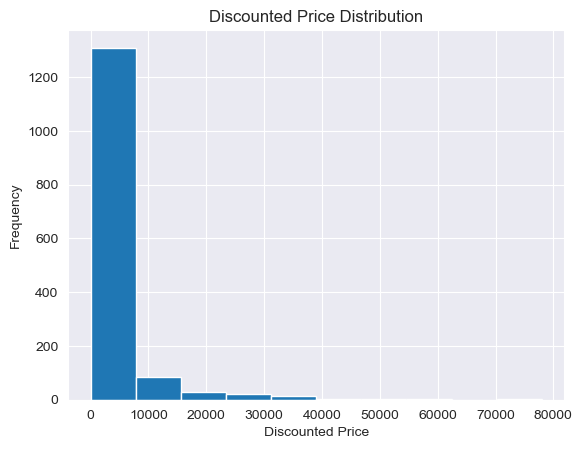

<Figure size 800x500 with 0 Axes>

In [170]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 2 - Actual Price Distribution

*   Column: 'actual_price'


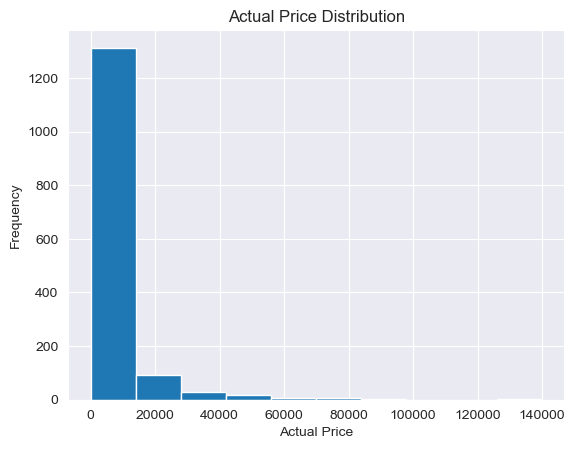

<Figure size 800x500 with 0 Axes>

In [171]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 3 - Rating Count Distribution

*   Column: 'rating_count'

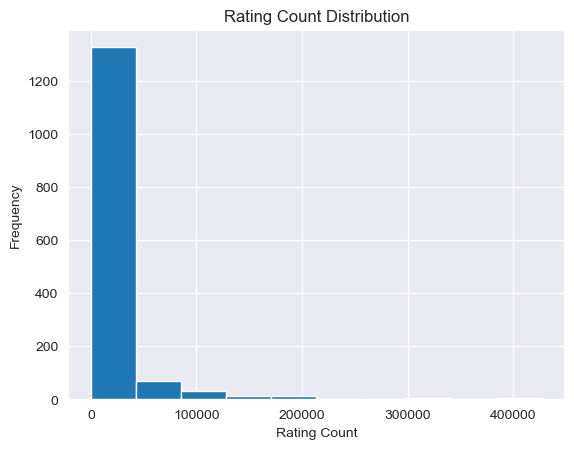

<Figure size 800x500 with 0 Axes>

In [172]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Explore relationship between columns using scatter plots, bar charts etc.

KeyError: 'category'